In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt


### Считываем данные и задаём заголовки

In [2]:
df = pd.read_csv('data/Mushroom_dataset.csv', delimiter=',', 
                    names=['Edibility', 'Сap-shape', 'Сap-surface', 'Cap-color', 'Bruises', 'Odor',
                          'Gill-Attachment', 'Gill-Spacing', 'Gill-Size', 'Gill-Color', 
                           'Stalk-Shape', 'Stalk-Root', 'Stalk-Surface-Above-Ring', 'Stalk-Surface-Below-Ring',
                          'Stalk-Color-Above-Ring','Stalk-Color-Below-Ring', 'Veil-Type','Veil-Color', 'Ring-Number',
                          'Ring-Type', 'Spore-Print-Color', 'Population', 'Habitat'])  

In [3]:
df.describe()

,Edibility,Сap-shape,Сap-surface,Cap-color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Type,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


In [4]:
name = df.columns
for i in name:
    le = preprocessing.LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])
 

## Разбиваем на test и train выборки

In [5]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [6]:
X.shape

(8416, 22)

In [7]:
Y.shape

(8416,)

In [8]:
X.iloc[0,:]

Сap-shape                    2
Сap-surface                  3
Cap-color                    8
Bruises                      0
Odor                         0
Gill-Attachment              1
Gill-Spacing                 1
Gill-Size                    1
Gill-Color                  10
Stalk-Shape                  1
Stalk-Root                   1
Stalk-Surface-Above-Ring     3
Stalk-Surface-Below-Ring     3
Stalk-Color-Above-Ring       7
Stalk-Color-Below-Ring       7
Veil-Type                    0
Veil-Color                   2
Ring-Number                  1
Ring-Type                    4
Spore-Print-Color            6
Population                   4
Habitat                      6
Name: 0, dtype: int32

In [9]:
Y[0]

0

In [10]:
train_percent = 80 # Процент тестовой формирует исходя из значения обучающей выборки

In [11]:
def train_test_split_X(data, train_percent):
    train = list()
    test = list()
    for i in range(0, len(data)):
        if i <= len(data) * 0.8:
            train.append(data.iloc[i,:])
        else:
            test.append(data.iloc[i,:])
    return np.array(train), np.array(test)

In [12]:
def train_test_split_Y(data, train_percent):
    train = list()
    test = list()
    for i in range(0, len(data)):
        if i <= len(data) * 0.8:
            train.append(data[i])
        else:
            test.append(data[i])
    return np.array(train), np.array(test)

In [13]:
trainX, testX = train_test_split_X(X, train_percent)
trainY, testY = train_test_split_Y(Y, train_percent)

### Проверяем Mlpclassifier и смотрим на метрики

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [15]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,4),
                        max_iter = 300,activation = 'relu',).fit(trainX, trainY)

In [16]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.69


D:\Users\misha\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Confusion Matrix for Winequality Dataset')

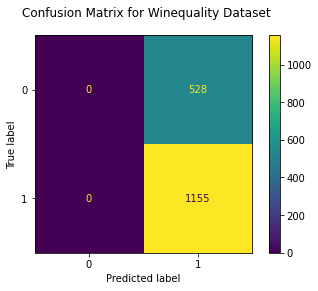

In [24]:
fig = plot_confusion_matrix(clf, testX, testY, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")

### Создаём архитектуру нашей сети

In [76]:
import matplotlib.pyplot as plt

### Класс для функции активации

In [79]:
'''
Artificial Neural Network Class
'''
class ANN:
    import numpy as np # linear algebra
    np.random.seed(10)
    
    '''
    Initialize the ANN;
    HiddenLayer vector : will contain the Layers' info
    w, b, phi = (empty) arrays that will contain all the w, b and activation functions for all the Layers
    mu = cost function
    eta = a standard learning rate initialization. It can be modified by the 'set_learning_rate' method
    '''
    def __init__(self) :
        self.HiddenLayer = []
        self.w = []
        self.b = []
        self.phi = []
        self.mu = []
        self.eta = 1 #set up the proper Learning Rate!!
    
    '''
    add method: to add layers to the network
    '''
    def add(self, lay = (4, 'ReLU') ):
        self.HiddenLayer.append(lay)
    
    '''
    FeedForward method: as explained before. 
    '''
    @staticmethod
    def FeedForward(w, b, phi, x):
        return phi(np.dot(w, x) + b)
        
    '''
    BackPropagation algorithm implementing the Gradient Descent 
    '''
    def BackPropagation(self, x, z, Y, w, b, phi):
        self.delta = []
        
        # We initialize ausiliar w and b that are used only inside the backpropagation algorithm once called        
        self.W = []
        self.B = []
        
        # We start computing the LAST error, the one for the OutPut Layer 
        self.delta.append(  (z[len(z)-1] - Y) * phi[len(z)-1](z[len(z)-1], der=True) )
        
        '''Now we BACKpropagate'''
        # We thus compute from next-to-last to first
        for i in range(0, len(z)-1):
            self.delta.append( np.dot( self.delta[i], w[len(z)- 1 - i] ) * phi[len(z)- 2 - i](z[len(z)- 2 - i], der=True) )
        
        # We have the error array ordered from last to first; we flip it to order it from first to last
        self.delta = np.flip(self.delta, 0)  
        
        # Now we define the delta as the error divided by the number of training samples
        self.delta = self.delta/self.X.shape[0] 
        
        '''GRADIENT DESCENT'''
        # We start from the first layer that is special, since it is connected to the Input Layer
        self.W.append( w[0] - self.eta * np.kron(self.delta[0], x).reshape( len(z[0]), x.shape[0] ) )
        self.B.append( b[0] - self.eta * self.delta[0] )
        
        # We now descend for all the other Hidden Layers + OutPut Layer
        for i in range(1, len(z)):
            self.W.append( w[i] - self.eta * np.kron(self.delta[i], z[i-1]).reshape(len(z[i]), len(z[i-1])) )
            self.B.append( b[i] - self.eta * self.delta[i] )
        
        # We return the descended parameters w, b
        return np.array(self.W), np.array(self.B)
    
    
    '''
    Fit method: it calls FeedForward and Backpropagation methods
    '''
    def Fit(self, X_train, Y_train):            
        print('Start fitting...')
        '''
        Input layer
        '''
        self.X = X_train
        self.Y = Y_train
        
        '''
        We now initialize the Network by retrieving the Hidden Layers and concatenating them 
        '''
        print('Model recap: \n')
        print('You are fitting an ANN with the following amount of layers: ', len(self.HiddenLayer))
        
        for i in range(0, len(self.HiddenLayer)) :
            print('Layer ', i+1)
            print('Number of neurons: ', self.HiddenLayer[i][0])
            if i==0:
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.X.shape[1])/np.sqrt(2/self.X.shape[1]) )
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.X.shape[1]))
                # Old initialization
                #self.w.append(2 * np.random.rand(self.HiddenLayer[i][0] , self.X.shape[1]) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)

            else :
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] )/np.sqrt(2/self.HiddenLayer[i-1][0]))
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.HiddenLayer[i-1][0]))
                # Old initialization
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )
        
            
            '''
            Here we backpropagate
            '''      
            self.w, self.b  = self.BackPropagation(self.X[I], self.z, self.Y[I], self.w, self.b, self.phi)
            
            '''
            Compute cost function
            ''' 
            self.mu.append(
                (1/2) * np.dot(self.z[len(self.z)-1] - self.Y[I], self.z[len(self.z)-1] - self.Y[I]) 
            )
            
        print('Fit done. \n')
        

    
    '''
    predict method
    '''
    def predict(self, X_test):
        
        print('Starting predictions...')
        
        self.pred = []
        self.XX = X_test
        
        for I in range(0, self.XX.shape[0]): # loop over the training set
            
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append(self.FeedForward(self.w[0] , self.b[0], self.phi[0], self.XX[I])) #First layer
    
            for i in range(1, len(self.HiddenLayer)) : # loop over the layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1]))
       
            # Append the prediction;
            # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
            # if y < 0.5 the output is zero, otherwise is zero
            self.pred.append( np.heaviside(  self.z[-1] - 0.5, 1)[0] ) # NB: self.z[-1]  is the last element of the self.z list
        
        print('Predictions done. \n')

        return np.array(self.pred)
   
    '''
    We need a method to retrieve the accuracy for each training data to follow the learning of the ANN
    '''
    def get_accuracy(self):
        return np.array(self.mu)
    # This is the averaged version
    def get_avg_accuracy(self):
        import math
        self.batch_loss = []
        for i in range(0, 10):
            self.loss_avg = 0
            # To set the batch in 10 element/batch we use math.ceil method
            # int(math.ceil((self.X.shape[0]-10) / 10.0))    - 1
            for m in range(0, (int(math.ceil((self.X.shape[0]-10) / 10.0))   )-1):
                #self.loss_avg += self.mu[60*i+m]/60
                self.loss_avg += self.mu[(int(math.ceil((self.X.shape[0]-10) / 10.0)) )*i + m]/(int(math.ceil((self.X.shape[0]-10) / 10.0)) )
            self.batch_loss.append(self.loss_avg)
        return np.array(self.batch_loss)
    
    '''
    Method to set the learning rate
    '''
    def set_learning_rate(self, et=1):
        self.eta = et
        
        
'''
layers class
'''
class layers :
    '''
    Layer method: used to call standar layers to add. 
    Easily generalizable to more general layers (Pooling and Convolutional layers)
    '''        
    def layer(p=4, activation = 'ReLU'):
        return (p, activation)

'''
Activation functions class
'''
class Activation_function(ANN):
    import numpy as np
    
    def __init__(self) :
        super().__init__()
        
    '''
    Define the sigmoid activator; we ask if we want the sigmoid or its derivative
    '''
    def sigmoid_act(x, der=False):
        if (der==True) : #derivative of the sigmoid
            f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
        else : # sigmoid
            f = 1/(1+ np.exp(- x))
        return f

    '''
    Define the Rectifier Linear Unit (ReLU)
    '''
    def ReLU_act(x, der=False):
        if (der == True): # the derivative of the ReLU is the Heaviside Theta
            f = np.heaviside(x, 1)
        else :
            f = np.maximum(x, 0)
        return f
    
    def list_act():
        return ['sigmoid', 'ReLU']
    
    def get_act(string = 'ReLU'):
        if string == 'ReLU':
            return ReLU_act
        elif string == 'sigmoid':
            return sigmoid_act
        else :
            return sigmoid_act

In [90]:
model = ANN()

model.add(layers.layer(22, 'ReLU'))
model.add(layers.layer(44, 'ReLU'))
model.add(layers.layer(11, 'ReLU'))
model.add(layers.layer(1, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(trainX, trainY)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

predictions = model.predict(testX)

Start fitting...
Model recap: 

You are fitting an ANN with the following amount of layers:  4
Layer  1
Number of neurons:  22
	Activation:  ReLU
Layer  2
Number of neurons:  44
	Activation:  ReLU
Layer  3
Number of neurons:  11
	Activation:  ReLU
Layer  4
Number of neurons:  1
	Activation:  sigmoid


C:\Users\misha\AppData\Local\Temp\ipykernel_16208\1280099542.py:6: RuntimeWarning: overflow encountered in exp
  f = 1/(1+ np.exp(- x))
C:\Users\misha\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:334: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)
C:\Users\misha\AppData\Local\Temp\ipykernel_16208\3002148751.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(self.W), np.array(self.B)


Fit done. 

Starting predictions...
Predictions done. 



In [91]:
predictions = predictions.astype(int)

In [92]:
predictions.shape

(1683,)

In [93]:
answer_prediction = list(le.inverse_transform(predictions))

In [94]:
label_testY = list(le.inverse_transform(testY))

In [95]:
cm = confusion_matrix(answer_prediction,label_testY)

In [96]:
cm

array([[   0,    0],
       [ 528, 1155]], dtype=int64)

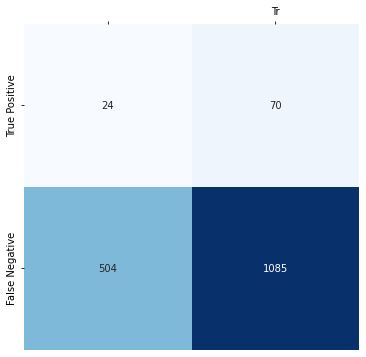

In [89]:
df_cm = pd.DataFrame(cm, index = ["True Positive", "False Negative"], columns = ["", "Tr"])
fig, ax = plt.subplots(1, 1, figsize =(6,6))
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g', cbar=False)
#plt.xlabel("Predicted Class", fontsize=18)
#plt.ylabel("True Class", fontsize=18)
plt.show()